# Audio signal processing

**Antoine van Kampen**   
November 2021   

Creative Commons License

This Python notebook aims to show the effect of room acoustics on a single sine wave. The room acoustics is represented by an impulse response (IR) measured with Room EQ wizard (EQ). 

The IR is convoluted with the sine wave. Subsequently, a Discrete Fourier Transform, using the Fast Fourier Transformation (FFT) is used to determine the frequency components.



In [ ]:
import matplotlib.pyplot as plt
from pylab import *
from basic_units import radians, degrees
import numpy as np
from scipy import fftpack
from scipy import signal
import scipy.io.wavfile
import array as arr

# Phase difference between to sine waves

The phase difference between to sine waves with different frequency, phase, and amplitude as function of time

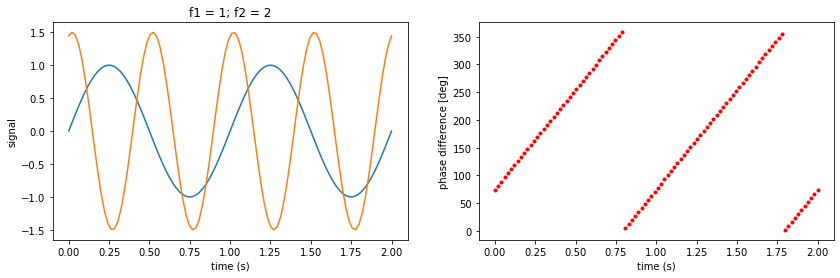

In [3]:
def sine_phase(t, A1, A2, f1, f2, p1, p2):
    # A = amplitude
    # f = frequency [Hz]
    # p = phase
    
    sine1 = A1 * np.sin(2*np.pi*f1*t + p1)
    sine2 = A2 * np.sin(2*np.pi*f2*t + p2)
    
    #convert rad to degrees and wrap at 360 degrees to 0
    phase_diff = ( 360.0/(2.0*np.pi) * ((2*np.pi*f2*t+p2) - (2*np.pi*f1*t+p1)) ) % 360  #diff between two sine waves
    
    return(sine1, sine2, phase_diff)

T = 2   # end time [s]
N = 100 # number of points

t = np.linspace(0,T,N,endpoint=True)

A1 = 1 #amplitude
A2 = 1.5 #amplitude
f1 = 1 #[Hz]
f2 = 2 #[Hz]
p1 = 0 #phase
p2 = 1.3 #phase
sine1, sine2, phase_diff = sine_phase(t, A1, A2, f1, f2, p1, p2)

fig,axs = plt.subplots(1,2,figsize=(14,4), sharey=False)
axs[0].plot(t,sine1)
axs[0].set_xlabel("time (s)")
axs[0].set_ylabel("signal")
axs[0].set_title(f"f1 = {f1}; f2 = {f2}")
axs[0].plot(t,sine2)
axs[1].plot(t,phase_diff,'r.')
axs[1].set_xlabel("time (s)")
axs[1].set_ylabel("phase difference [deg]")

plt.show()

# Phase difference of sine waves
Phase difference of since waves that are delayed with a constant time as function of frequency

[array([[0.45097501, 0.22265848, 0.18046748, 0.40289456, 0.41996991,
        0.00412954, 0.52856873, 0.98519464, 0.30223088, 0.75788477],
       [0.02878636, 0.83960032, 0.82642447, 0.69475579, 0.94991338,
        0.46499454, 0.92397965, 0.95681916, 0.89204767, 0.56714334],
       [0.37173417, 0.01632382, 0.1316595 , 0.73788114, 0.50424465,
        0.24163313, 0.28870275, 0.52656225, 0.97647183, 0.27393601]]), array([[0.98808052, 0.87221882, 0.21774524, 0.47487375, 0.04678299,
        0.09575532, 0.88948934, 0.41787322, 0.93500461, 0.53473316],
       [0.91635179, 0.80558278, 0.99019925, 0.34071935, 0.29147196,
        0.29194529, 0.4096857 , 0.52406569, 0.4770457 , 0.82190845],
       [0.45654443, 0.61767083, 0.59775236, 0.54763766, 0.87935852,
        0.37182715, 0.56756054, 0.68494293, 0.34076024, 0.67300516]])]
[[0.45097501 0.22265848 0.18046748 0.40289456 0.41996991 0.00412954
  0.52856873 0.98519464 0.30223088 0.75788477]
 [0.02878636 0.83960032 0.82642447 0.69475579 0.94991338 0

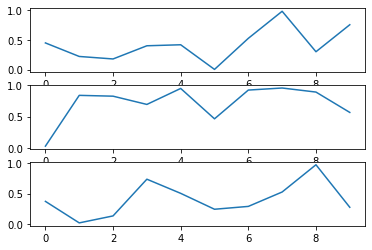

In [12]:
raws = [np.random.rand(3, 10), np.random.rand(3, 10)]
print(raws)
raws = raws[0]
print(raws)
f, axes = plt.subplots(len(raws), 1)
for i in range(len(raws)):
    axes[i].plot(raws[i])

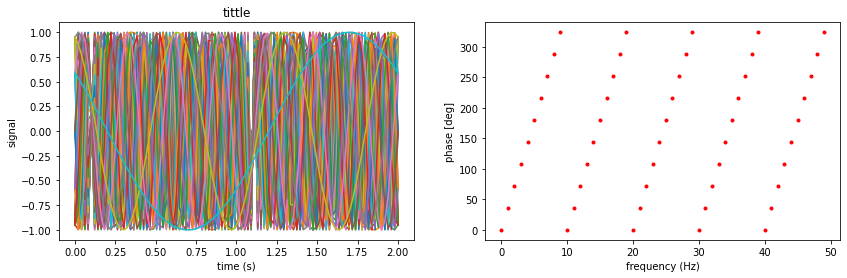

In [28]:
def sine_delay(t, A, f, p, delay):
    # A = amplitude
    # f = frequency [Hz]
    # p = phase
    
    sine_list  = []
    phase_list = []
    
    for f1 in f:
        sine = A * np.sin(2*np.pi*f1*(t-delay) + p)
        sine_list.append(sine)
        
        #calculate phase and convert to degrees; wrap at 360 degrees to 0
        phase = ( 360.0/(2.0*np.pi) * (2*np.pi*f1*delay) ) % 360  
        phase_list.append(phase)
        
    return(sine_list, phase_list)

T = 2   # end time [s]
N = 100 # number of points
t = np.linspace(0,T,N,endpoint=True)


Nf  = 50 # number of frequencies
f   = np.arange(0,Nf)

delay = 100 # time delay for all frequencies [ms]
delay = delay / 1000 # convert to [s]

A = 1 #amplitude
p = 0 #phase
sine, phase = sine_delay(t, A, f, p, delay)

fig,axs = plt.subplots(1,2,figsize=(14,4), sharey=False)

for i in np.arange(0,Nf):
    axs[0].plot(t,sine[i])
axs[0].set_xlabel("time (s)")
axs[0].set_ylabel("signal")
axs[0].set_title("tittle")

axs[1].plot(f,phase,'r.')
axs[1].set_xlabel("frequency (Hz)")
axs[1].set_ylabel("phase [deg]")

plt.show()

# Phase response (phase over frequency)

Instead of two sine waves, we now use a single sine wave and a transfer function
sin2(t) = sin2(t) + sin1(t-1)

1.0
2.0
3.0
4.0
5.0
6.0
7.0
8.0
9.0
10.0
[ 1.  2.  3.  4.  5.  6.  7.  8.  9. 10.]
[114.59155903  49.13701357 343.68246812 278.22792266 212.77337721
 147.31883175  81.8642863   16.40974084 310.95519539 245.50064994
 180.04610448 114.59155903  49.13701357 343.68246812 278.22792266
 212.77337721 147.31883175  81.8642863   16.40974084 310.95519539
 245.50064994 180.04610448 114.59155903  49.13701357 343.68246812
 278.22792266 212.77337721 147.31883175  81.8642863   16.40974084
 310.95519539 245.50064994 180.04610448 114.59155903  49.13701357
 343.68246812 278.22792266 212.77337721 147.31883175  81.8642863
  16.40974084 310.95519539 245.50064994 180.04610448 114.59155903
  49.13701357 343.68246812 278.22792266 212.77337721 147.31883175
  81.8642863   16.40974084 310.95519539 245.50064994 180.04610448
 114.59155903  49.13701357 343.68246812 278.22792266 212.77337721
 147.31883175  81.8642863   16.40974084 310.95519539 245.50064994
 180.04610448 114.59155903  49.13701357 343.68246812 278.227

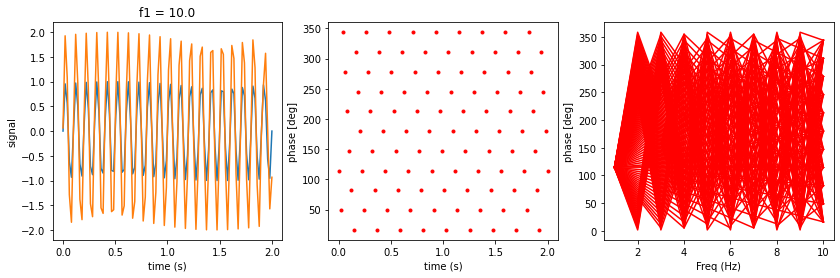

In [94]:
def rotate(l, y=1):
    if len(l) == 0:
        return l
    y = y % len(l)    # to let it work for negative y
    return l[y:] + l[:y]

#l=[1,2,3,4,5]
#print(rotate(l,1))
      
def phase_response(t, A1, f1, p1):
    # A = amplitude
    # f = frequency [Hz]
    # p = phase
    
    sine1 = A1 * np.sin(2*np.pi*f1*t + p1)
    sine2 = sine1 + rotate(list(sine1),5) # rotate creates a phase shift 
    
    #convert rad to degrees and wrap at 360 degrees to 0
    phase_diff = ( 360.0/(2.0*np.pi) * ((2*np.pi*f2*t+p2) - (2*np.pi*f1*t+p1)) ) % 360  #diff between two sine waves
    
    return(sine1, sine2, phase_diff)

T = 2   # end time [s]
N = 100 # number of points

t = np.linspace(0,T,N,endpoint=True)

A1 = 1 #amplitude
f1 = 1 #[Hz]
p1 = 0 #phase

N=10 
freq = np.linspace(1,10,N,endpoint=True)
ph = []
for f1 in freq:
    print(f1)
    sine1, sine2, phase = phase_response(t, A1, f1, p1)
    ph.append(phase)

print(freq)  
print(phase)
print(len(phase))

fig,axs = plt.subplots(1,3,figsize=(14,4), sharey=False)
axs[0].plot(t,sine1)
axs[0].set_xlabel("time (s)")
axs[0].set_ylabel("signal")
axs[0].set_title(f"f1 = {f1}")
axs[0].plot(t,sine2)
axs[1].plot(t,phase,'r.')
axs[1].set_xlabel("time (s)")
axs[1].set_ylabel("phase [deg]")
axs[2].plot(freq,ph,'r')
axs[2].set_xlabel("Freq (Hz)")
axs[2].set_ylabel("phase [deg]")
plt.show()

# Demonstration of FFT
Example is taken from the book Numerical Python (2nd edition) from Robert Johansson, Apress.

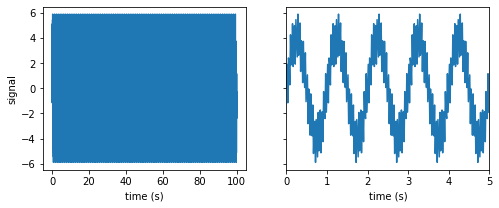

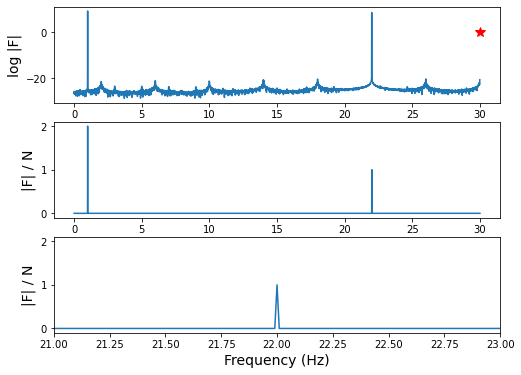

In [6]:
def signal_samples(t):
    A1 = 4  #amplitude
    f1 = 1  #frequency [Hz]
    p1 = 0  #phase [rad]
    
    A2 = 2  #amplitude
    f2 = 22 #frequency [Hz]
    p2 = 0  #phase [rad]
    
    #print(t)
    #print(*np.shape(t))
          
    #signal = (A1 * np.sin(2*np.pi*f1*t + p1) + A2 * np.sin(2*np.pi*f2*t + p2) \
    #          + np.random.randn(*np.shape(t)))
    signal = (A1 * np.sin(2*np.pi*f1*t + p1) + A2 * np.sin(2*np.pi*f2*t + p2)) 
    
    return(signal)

B = 30                      #max frequency
f_s = 2*B                   #sampling frequency twice as high
delta_f = 0.01              #frequency resolution in spectrum
N = int(f_s / delta_f)      #number of samples
#N = 2**18
T = N / f_s 

t = np.linspace(0,T,N,endpoint=False)
s = signal_samples(t)

#print(2*np.pi*t)
#print(s[0:5])
#e=[x - s[i - 1] for i, x in enumerate(s)][1:]
#print(e[0:5])
#print(s[-2])


fig,axs = plt.subplots(1,2,figsize=(8,3),sharey=True)
axs[0].plot(t,s)
axs[0].set_xlabel("time (s)")
axs[0].set_ylabel("signal")
axs[1].plot(t,s)
axs[1].set_xlim(0,5)
axs[1].set_xlabel("time (s)")
plt.show()

#Peform Discrete Fourier Transform
win = np.kaiser(len(s),5)        #Windowing; see https://www.oreilly.com/library/view/elegant-scipy/9781491922927/ch04.html
win=1
F = fftpack.fft(s * win)         #FFT
f = fftpack.fftfreq(N,1.0/f_s)   #Get frequency bins to match FFT  

mask = np.where(f>=0) #spectrum is symmetric around 0; only take positve frequencies


fig, axs = plt.subplots(3,1,figsize=(8,6))
axs[0].plot(f[mask],np.log(abs(F[mask])), label="real")
axs[0].plot(B,0,'r*', markersize=10)
axs[0].set_ylabel("log |F|", fontsize=14)
axs[1].plot(f[mask],np.abs(F[mask])/N, label="real")
axs[1].set_ylabel("|F| / N", fontsize=14)
axs[2].plot(f[mask],np.abs(F[mask])/N, label="real")
axs[2].set_xlim(21,23)
axs[2].set_xlabel("Frequency (Hz)", fontsize=14)
axs[2].set_ylabel("|F| / N", fontsize=14)
plt.show()

## Calculate phase

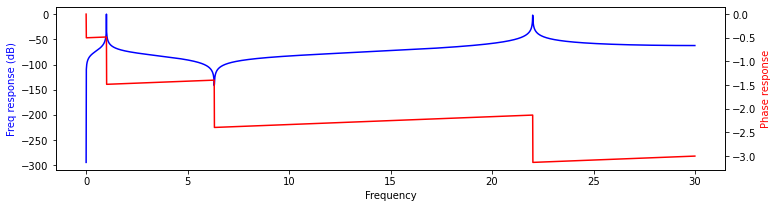

In [32]:

#amplit = (abs(F)/N)

dB     = 20 * np.log10(abs(F[mask]/N))
phase  = np.unwrap(np.angle(F))
phase  = phase / np.pi


#f,h = signal.freqz(f_t)
fix, axs = plt.subplots(1,1,figsize=(12,3))
#h_ampl = 20 * np.log10(abs(h))
#h_phase = np.unwrap(np.angle(h))

axs.plot(f[mask], dB, 'b')
axs.set_ylabel("Freq response (dB)", color="blue")
axs.set_xlabel(r'Frequency')
axs = axs.twinx()
axs.plot(f[mask], phase[mask], 'r')
axs.set_ylabel('Phase response', color="red")
plt.show()

# Effect of acoustics on pure sine wave

Sampling frequency 50
sampling interval 0.0002
time (502 points): [0.     0.0002 0.0004 0.0006 0.0008 0.001  0.0012 0.0014 0.0016 0.0018]
Amplitude: 1
Frequency: 100.0
Phase: 0.0
pi: 3.141592653589793


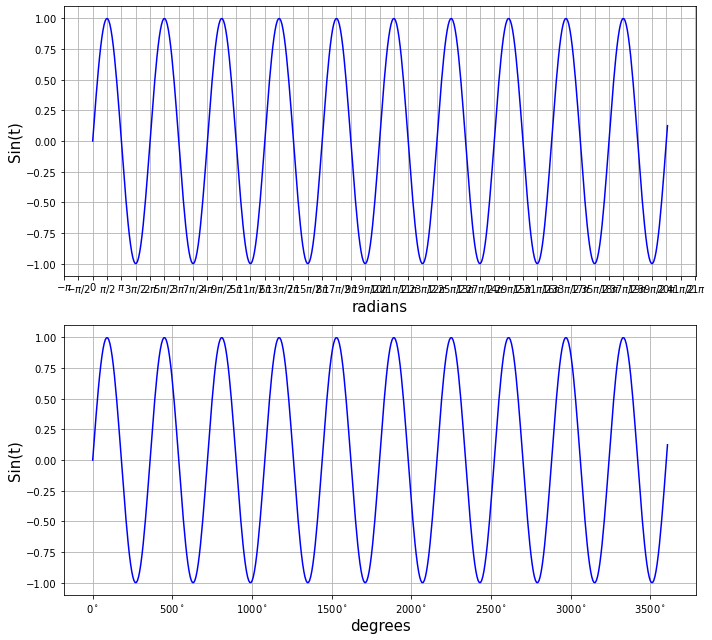

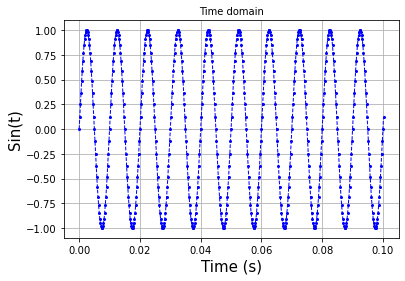

In [12]:
def GenerateSignal(f, phase, A):

    #f     =  Frequency of the signal [Hz = 1/s]
    #A     =  Amplitude of sine
    #phase =  Phase [rad]

    # How many time points are needed for one cycle i,e., Sampling Frequency
    samplingFrequency = 50;
    
    # At what intervals time points are sampled (sample one cycle with sampleFrequency points)
    samplingInterval = 1 / (f * samplingFrequency)

    # Begin and emd time period of the signals
    beginTime = 0;            #[s]
    endTime   = 10.0 * 1.0/f ; #[s]  10 full sine waves
    
    # Time points [s]
    # Note the EndTime is not included. Thus by adding samplingInterval the array 
    # includes beginTime and EndTime
    time = np.arange(beginTime, endTime+samplingInterval, samplingInterval);
    
    print(f"Sampling frequency {samplingFrequency}")
    print(f"sampling interval {samplingInterval}")
    #print(f"time full ({len(time)} points): {time}")
    print(f"time ({len(time)} points): {time[0:10]}")
    print(f"Amplitude: {A}")
    print(f"Frequency: {f}")
    print(f"Phase: {phase}")
    print(f"pi: {np.pi}")
    
    # Create sine wave
    Signal = A * np.sin(2.0 * np.pi * f * time + phase)
 
    return(time, Signal)
## End GenerateSignal


f     = 100.0         # [Hz] Frequency
phase = 0.0           #0.5 * np.pi   # [radian]
A     = 1.0           # Amplitude  

time, S = GenerateSignal(f, phase, A=1)

tmp = 2.0 * np.pi * time * f + phase
rad = [val*radians for val in tmp]

BASE_SIZE   = 10
SMALL_SIZE  = BASE_SIZE 
MEDIUM_SIZE = BASE_SIZE+5 
BIGGER_SIZE = BASE_SIZE+10

plt.rc('font', size=SMALL_SIZE)          # controls default text sizes
plt.rc('axes', titlesize=SMALL_SIZE)     # fontsize of the axes title
plt.rc('axes', labelsize=MEDIUM_SIZE)    # fontsize of the x and y labels
plt.rc('xtick', labelsize=SMALL_SIZE)    # fontsize of the tick labels
plt.rc('ytick', labelsize=SMALL_SIZE)    # fontsize of the tick labels
plt.rc('legend', fontsize=SMALL_SIZE)    # legend fontsize
plt.rc('figure', titlesize=BIGGER_SIZE)  # fontsize of the figure title


# Make plot in radian and degrees domain
fig, axs = plt.subplots(2)
fig.set_size_inches(10,9)

axs[0].plot(rad,  S, xunits=radians, color='blue')
axs[1].plot(rad,  S, xunits=degrees, color='blue')

for ax in axs.flat:
    ax.set_ylabel('Sin(t)')
    ax.grid()
    
fig.tight_layout()
plt.show()

# Make plot in time domain
plt.plot(time,S,color='blue',marker='o',markersize=2,linestyle='--',linewidth=1)
plt.title('Time domain')
plt.xlabel('Time (s)')
plt.ylabel('Sin(t)')
plt.grid(True)
plt.show()

Length t: 80000
[0.00000000e+00 2.50003125e-05 5.00006250e-05 ... 1.99995000e+00
 1.99997500e+00 2.00000000e+00]


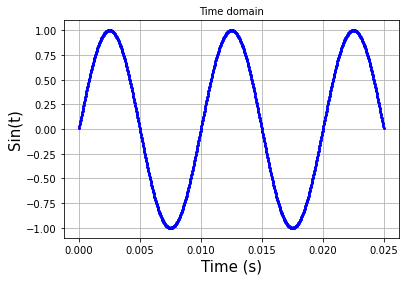

In [19]:
def GenerateSignal2(f, phase, A):

    #f     =  Frequency of the signal [Hz = 1/s]
    #A     =  Amplitude of sine
    #phase =  Phase [radd]
    
    t = np.linspace(0,2,80000)
    print(f"Length t: {len(t)}")
    print(t)
        
    # Create sine wave
    Signal = A * np.sin(2.0 * np.pi * f * t + phase)
 
    return(t, Signal)
## End GenerateSignal


f     = 100.0         # [Hz] Frequency
phase = 0.0           #0.5 * np.pi   # [radian]
A     = 1.0           # Amplitude  

t, S = GenerateSignal2(f, phase, A=1)

#t=t[1:1000]
#S=S[1:1000]

BASE_SIZE   = 10
SMALL_SIZE  = BASE_SIZE 
MEDIUM_SIZE = BASE_SIZE+5 
BIGGER_SIZE = BASE_SIZE+10

plt.rc('font', size=SMALL_SIZE)          # controls default text sizes
plt.rc('axes', titlesize=SMALL_SIZE)     # fontsize of the axes title
plt.rc('axes', labelsize=MEDIUM_SIZE)    # fontsize of the x and y labels
plt.rc('xtick', labelsize=SMALL_SIZE)    # fontsize of the tick labels
plt.rc('ytick', labelsize=SMALL_SIZE)    # fontsize of the tick labels
plt.rc('legend', fontsize=SMALL_SIZE)    # legend fontsize
plt.rc('figure', titlesize=BIGGER_SIZE)  # fontsize of the figure title


# Make plot in time domain
plt.plot(t,S,color='blue',marker='o',markersize=2,linestyle='--',linewidth=1)
plt.title('Time domain')
plt.xlabel('Time (s)')
plt.ylabel('Sin(t)')
plt.grid(True)
plt.show()

In [20]:
def readIR(fname):
    IR = open(fname,"r")

    start = "* Data start"
    flag = True
 
    line = IR.readline()
    while flag and line !="":
        #print(line)
        if not start in line:
            print(">",line,end="")
        else:
            print(line)
            flag = False 
        
        if(flag):
            line=IR.readline()

    ImpResp = []
    for line in IR:
        ImpResp.append(float(line))
    
    return (ImpResp)

In [21]:
IRfull=readIR("./IR-NoAcoustics.txt")
print("Type IR = ",type(IRfull))
print("Length IR = ",len(IRfull))

> * Impulse Response data saved by REW V5.20.4
> * IR is normalised
> * IR window has not been applied
> * IR is not the min phase version
> * Source: ASIO X-USB ASIO Driver, In 30
> * Dated: 26-Oct-2021 19:46:14
> * Measurement: No acoustics
> * Excitation: 256k Log Swept Sine, 1 sweep at -12.0 dBFS with no timing reference
> * Response measured over: 0.3 to 22,000.2 Hz
> 0.051925599575042725 // Peak value before normalisation
> 44100 // Peak index
> 131072 // Response length
> 2.2675736961451248E-5 // Sample interval (seconds)
> -1.0 // Start time (seconds)
* Data start

Type IR =  <class 'list'>
Length IR =  131072


Number of samples from t=-1 to t=0: 44100
Number of samples in 50.0 ms: 2205


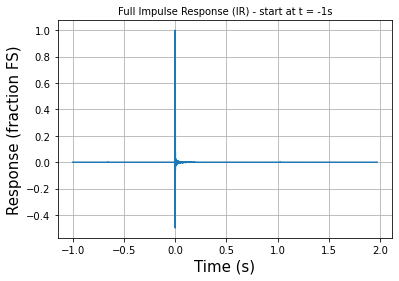

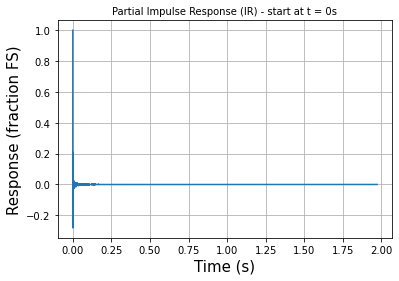

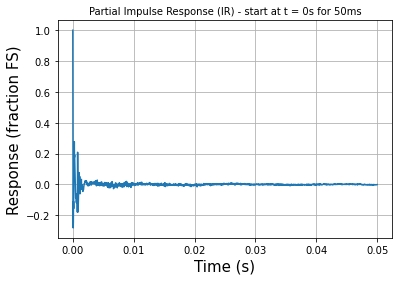

In [22]:
#From output above:
start          = -1.0 #Start time (seconds)
step           = 2.2675736961451248E-5
ResponseLength = 131072  

#time for full response
time = np.arange(start,start+ResponseLength*step,step)

zeroStart = -int(start/step)  #index at which t=0
print(f"Number of samples from t=-1 to t=0: {zeroStart}")
IR=IRfull[zeroStart:ResponseLength]
time2 = np.arange(0,len(IR)*step,step)

timeRange = 0.05 # 50ms
samples  = int(timeRange/step)
#samples = 50
print(f"Number of samples in {timeRange*1000} ms: {samples}")
IR50=IRfull[zeroStart:(zeroStart+samples)]
time3 = np.arange(0,samples*step,step)

#plot full repsonse
plt.grid(True)
plt.title("Full Impulse Response (IR) - start at t = -1s")
plt.plot(time,IRfull)
plt.xlabel("Time (s)")
plt.ylabel("Response (fraction FS)")
#plt.savefig('foo2.png')
plt.show()

#plot full repsonse
plt.grid(True)
plt.title("Partial Impulse Response (IR) - start at t = 0s")
plt.plot(time2,IR)
plt.xlabel("Time (s)")
plt.ylabel("Response (fraction FS)")
#plt.savefig('foo2.png')
plt.show()

#plot full repsonse
plt.grid(True)
plt.title("Partial Impulse Response (IR) - start at t = 0s for 50ms")
plt.plot(time3,IR50)
plt.xlabel("Time (s)")
plt.ylabel("Response (fraction FS)")
#plt.savefig('foo2.png')
plt.show()


Length t: 80000
[0.00000000e+00 2.50003125e-05 5.00006250e-05 ... 1.99995000e+00
 1.99997500e+00 2.00000000e+00]


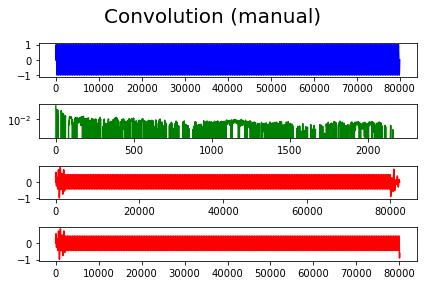

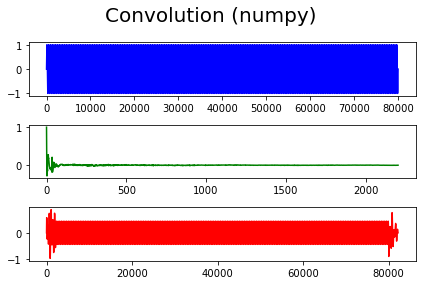

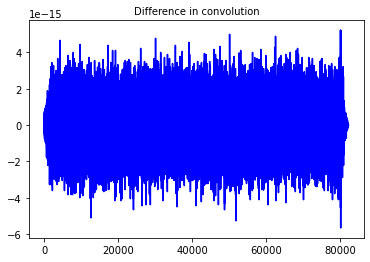

In [23]:
# Generate sine wave
f     = 100.0         # [Hz] Frequency
phase = 0.0           # 0.5 * np.pi   # [radian]
A     = 1.0           # Amplitude  

t, S = GenerateSignal2(f, phase, A=1)

Signal_l = len(S)
IR_l     = len(IR50)

#print(f"Length IR {IR_l}")
#print(f"length S {len(S)}")

S2        = [0]*IR_l + list(S) + [0]*IR_l
Signal2_l = len(S2)

#print(Signal)
#print(f"Length S after merging with IR {Signal2_l}")

#IR     = [1]*IR_l
#IR     = SimulateIR(IR_l)

def Convolute2(IR,Signal,IR_l, Signal_l):
    out = []
    #print(Signal_l)
    #print(IR_l)
    #for t in range(IR_l,(Signal_l-IR_l)):
    for t in range(IR_l,Signal_l):
        #t-=1
        #print(">",t)
        tmp=0
        for tau in range(0,IR_l):
            #print("S=",t-tau," IR=",tau)
            tmp+=IR[tau]*Signal[t-tau]
        out.append(tmp)
    return(out)     

c1=Convolute2(IR50,S2,IR_l,Signal2_l)

fig, axs = plt.subplots(4)
fig.suptitle('Convolution (manual)')
axs[0].plot(S, 'b')
axs[1].set_yscale('log')
axs[1].plot(IR50, 'g')
axs[2].plot(c1, 'r')
axs[3].plot(c1[0:(Signal_l+100)], 'r')
fig.tight_layout()
plt.show()

c2=np.convolve(IR50,S)
fig, axs = plt.subplots(3)
fig.suptitle('Convolution (numpy)')
axs[0].plot(S, 'b')
axs[1].plot(IR50, 'g')
axs[2].plot(c2, 'r')
fig.tight_layout()
plt.show()

cDiff = c2-c1[0:len(c2)]
plt.title('Difference in convolution')
plt.plot(cDiff, 'b')
plt.show()

80000
80000
0.5
[ 0.000e+00  6.250e-06  1.250e-05 ... -1.875e-05 -1.250e-05 -6.250e-06]
[-2.11869411e-12 -0.j          4.34111275e-01 -4.95587016j
  1.72401944e+00 -9.77931365j ...  3.83279839e+00+14.34156164j
  1.72401944e+00 +9.77931365j  4.34111275e-01 +4.95587016j]


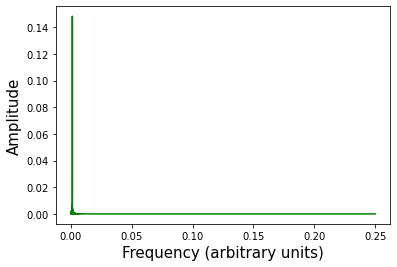

In [30]:
print(len(t))

#print(t)

N=len(t)
f_s=0.5  #N*0.0002

print(N)
print(f_s)

F = fftpack.fft(c2)
f = fftpack.fftfreq(N,1.0/f_s)
mask = np.where(f>=0)

print(f)
print(F)

#plt.plot(f,F)
plt.plot(f[mask],abs(F[mask]/N),color='green')
plt.xlabel("Frequency (arbitrary units)")
plt.ylabel("Amplitude")
#plt.savefig('foo2.png')
plt.show()
